**Project Title:**  

*Data-Driven Real Estate Optimization in King County*

**By:**  
                - [Julliet Iswana](https://github.com/Iswana-O)
                - [Wayne Kipngeno Korir](https://github.com/waynekipngeno)
                - [Eva Kiio](https://github.com/evamwende)
                - [Oscar Mulei](https://github.com/omulei)


### **Business Case:**
In the thriving real estate market of King County, the capacity to make strategic pricing decisions can either enhance profits or turn assets into liabilities. Haven-Kings Property Management, with its vast portfolio, stands at a pivotal juncture where conventional pricing methods no longer suffice. The digital age demands a shift from age-old practices like the Comparative Market Analysis (CMA) and the "1% Rule" to a more agile, data-driven approach. By leveraging advanced analytical methods, such as multiple regression analysis, property management firms can tap into precise pricing strategies, enhancing revenue streams and ensuring sustainable growth.

### **Overview:**
This project aims to harness the power of data analytics to revolutionize Haven-Kings Property Management's pricing strategies in King County's competitive real estate landscape.

### **Objective:**
Guided by data insights and multiple regression analysis, the team sets out to:
1. **Optimize House Pricing:** Craft a model that tailors pricing based on property features, regional nuances, and emerging market trends.
2. **Predict Renovation Needs:** Forecast the opportune moments for property renovations, ensuring assets remain prime and attractive.
3. **Dynamic Pricing Recommendations:** Pivot rental prices in real-time, aligning with market fluctuations and property specifics.

### **Research Questions:**
1. **House Pricing:** 
   - Dissect key determinants shaping house prices in King County.
   - Analyze the interplay between property attributes and their market value.
   - Appraise the precision of the regression model in predicting property prices.
   
2. **Renovation Needs:**
   - Decipher historical data to project upcoming renovation timelines.
   - Identify property indicators that signal imminent renovation requirements.
   - Evaluate the utility of regression analysis in renovation foresight.
   
3. **Dynamic Pricing Recommendations:**
   - Construct a robust framework for real-time pricing using multiple regression analysis.
   - Spotlight pivotal factors for adaptive rental rate revisions.
   - Assess the ramifications of dynamic pricing on revenue trajectories and market stature.

### Data Source:
The foundation of this project rests on the [kc_house_data.csv](./data/kc_house_data.csv) dataset from King County House Sales.

---

### **Data Overview: King County House Sales**

**Time Frame**: Homes sold between May 2014 and May 2015.

**Structure**:
- **Observations**: 21,613
- **Features**: 20 (excluding target variable)
- **Target Variable**: Price

**Key Features**:
- **Size & Structure**: `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `sqft_above`, `sqft_basement`
- **Location & View**: `waterfront`, `view`, `zipcode`, `lat`, `long`
- **Quality & Condition**: `condition`, `grade`
- **Age & Renovation**: `yr_built`, `yr_renovated`
- **Recent Renovations**: `sqft_living15`, `sqft_lot15`

**Insights**: 
- Price is heavily influenced by features like `bedrooms`, `sqft_living`, and the house's location.
- No missing values, aiding in model accuracy.

**Analysis Steps**:
1. Import necessary libraries.
2. Load the dataset.
3. Explore data structure, types, and basic statistics.
4. Visualize data for insights.
5. Perform regression analyses: simple, multiple, and polynomial.

In [1]:
# libraries for numerical
import pandas as pd
import numpy as np

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# to plot the diagrams within the cells
%matplotlib inline

# libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import pearsonr
from itertools import combinations


import warnings
warnings.filterwarnings('ignore')


In [2]:
# %%timeit

# for i in range(10000):
#     continue

In [3]:
#Import and preview the data
df = pd.read_csv("data/kc_house_data.csv")
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Summary statistics for the numerical columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Drop id column as it isn't relevant for our analysis
df.drop(columns=['id'], axis=1, inplace=True)

We've identified the following columns with `object` data type: `date`, `waterfront`, `view`, `condition`, `grade`, and `sqft_basement`.

To convert these columns to `float`:

1. `date`: We can convert this to a datetime format and then extract the ordinal (number of days since year 1) to represent it as a float.
2. `waterfront`: We can replace 'NO' with 0, 'YES' with 1, and handle NaNs.
3. `view`: We can map the values to numbers (e.g., 'NONE' to 0, 'AVERAGE' to 1, etc.) and handle NaNs.
4. `condition`: Similar to `view`, we can map the values to numbers.
5. `grade`: This can be mapped based on the numbers present in the string. 

In [6]:
# Convert 'waterfront' to float
df['waterfront'] = df['waterfront'].replace({'NO': 0, 'YES': 1})

# Convert 'view' to float
view_mapping = {'NONE': 0, 'AVERAGE': 1, 'FAIR': 2, 'GOOD': 3, 'EXCELLENT': 4}
df['view'] = df['view'].replace(view_mapping)

# Convert 'condition' to float
condition_mapping = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}
df['condition'] = df['condition'].replace(condition_mapping)

# Convert 'grade' to float by extracting the number from the string
df['grade'] = df['grade'].str.extract('(\d+)').astype(float)

# Verify the conversions
df[['waterfront', 'view', 'condition', 'grade']].dtypes


waterfront    float64
view          float64
condition       int64
grade         float64
dtype: object

In [7]:
df['sqft_basement'] = df.sqft_basement.replace('?', 0.0)
df.sqft_basement.value_counts()

#Convert sqft_basement to float
df['sqft_basement']= df.sqft_basement.astype('float64')

In [8]:
#Convert date column to 2 separate columns for month and year
date = df['date'].str.split('/', expand=True)
df['month_sold'] = date[0].astype('float64')
df['year_sold'] = date[2].astype('float64')

#Drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

In [9]:
#Convert year_built to age
df['age'] = 2015 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)

In [10]:
# Confirm no missing values
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month_sold          0
year_sold           0
age                 0
dtype: int64

In [11]:
# percentage of missing values
for x in ['waterfront', 'view', 'yr_renovated']:
    percent_missing = df[x].isnull().sum() * 100 / len(df)
    print(x, ':', percent_missing)

waterfront : 11.00152798999861
view : 0.29170718155299347
yr_renovated : 17.78950780200954


In [12]:
# Drop missing values 
df.dropna(subset=['waterfront', 'view', 'yr_renovated'], inplace=True)

In [13]:
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15762 non-null  float64
 1   bedrooms       15762 non-null  int64  
 2   bathrooms      15762 non-null  float64
 3   sqft_living    15762 non-null  int64  
 4   sqft_lot       15762 non-null  int64  
 5   floors         15762 non-null  float64
 6   waterfront     15762 non-null  float64
 7   view           15762 non-null  float64
 8   condition      15762 non-null  int64  
 9   grade          15762 non-null  float64
 10  sqft_above     15762 non-null  int64  
 11  sqft_basement  15762 non-null  float64
 12  yr_renovated   15762 non-null  float64
 13  zipcode        15762 non-null  int64  
 14  lat            15762 non-null  float64
 15  long           15762 non-null  float64
 16  sqft_living15  15762 non-null  int64  
 17  sqft_lot15     15762 non-null  int64  
 18  month_

None

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2,7.0,...,400.0,1991.0,98125,47.7210,-122.319,1690,7639,12.0,2014.0,64
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,4,7.0,...,910.0,0.0,98136,47.5208,-122.393,1360,5000,12.0,2014.0,50
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,2,8.0,...,0.0,0.0,98074,47.6168,-122.045,1800,7503,2.0,2015.0,28
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,2,11.0,...,1530.0,0.0,98053,47.6561,-122.005,4760,101930,5.0,2014.0,14
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,2,7.0,...,0.0,0.0,98003,47.3097,-122.327,2238,6819,6.0,2014.0,20


In [14]:
# Confirm no missing values
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month_sold       0
year_sold        0
age              0
dtype: int64


-----

### Data Exploration:

Let's begin with data exploration to better understand the dataset's characteristics.

To get an idea of the linear relationship between features and price, we will use a regplot for each feature.


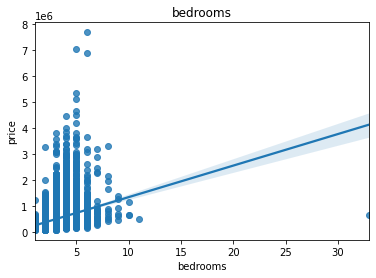

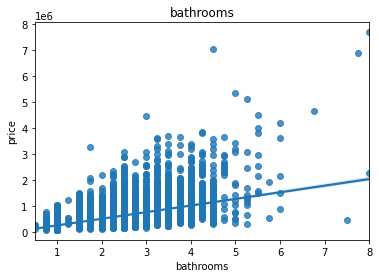

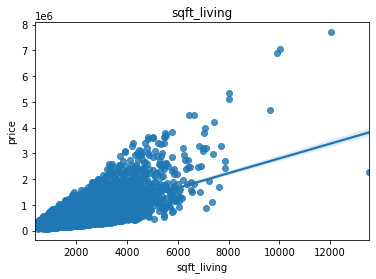

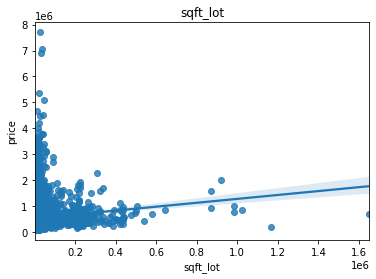

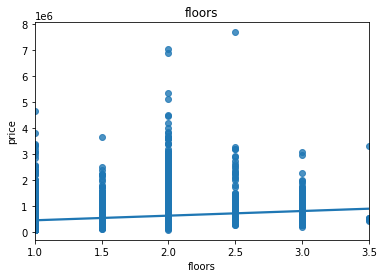

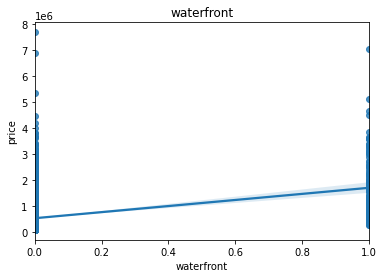

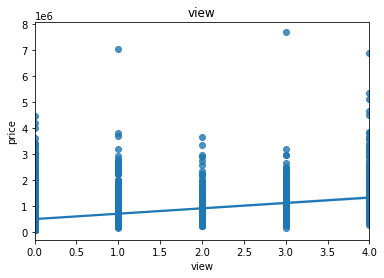

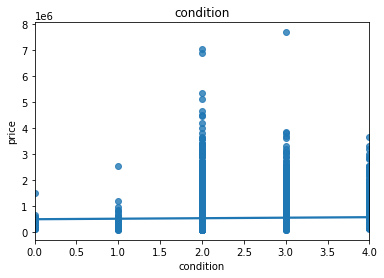

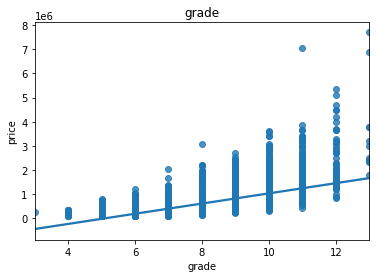

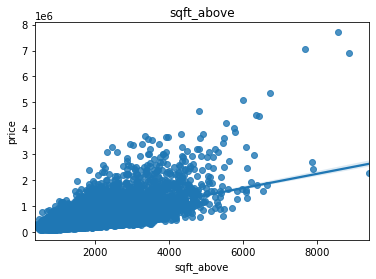

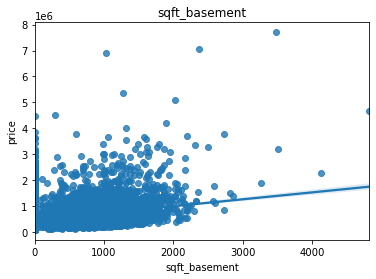

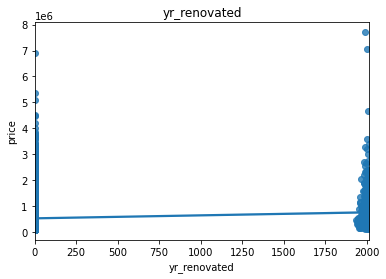

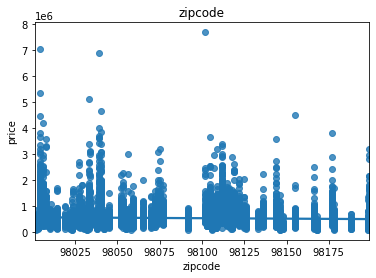

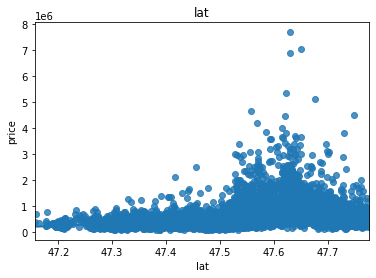

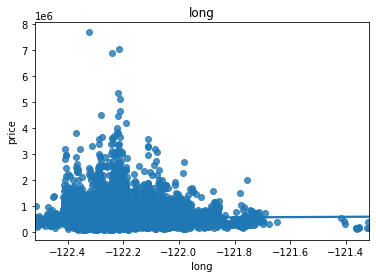

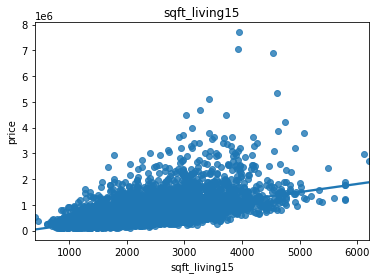

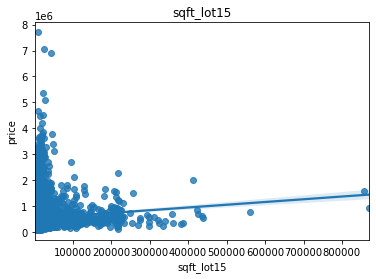

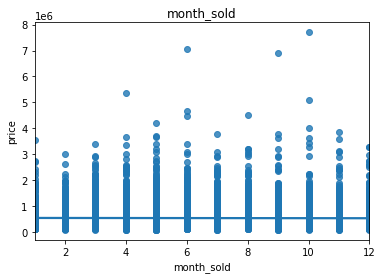

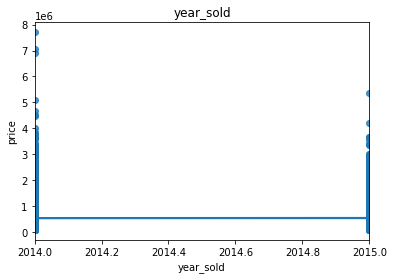

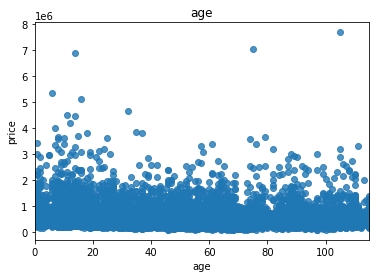

In [15]:
#Preview the relationship between features and target variables
X = df.drop(columns=['price'], axis=1)
for col in X.columns:
    plt.subplots(1, 1)
    sns.regplot(X[col], df.price)
    plt.title(col)

There are several features where there is a clear linear relationship with price, but there are some features where the relationship is not so clear. We can further look at the correlation between all of our features and price to get a better idea of which features have a linear relationship with the dependent variable. 

Now that we have our data cleaned, we will look at how each predictor correlates with price and we'll plot the correlations as well.

In [16]:
X = df.drop(columns=['price'], axis=1)
y = df.price

correlation_list = []
skipped_columns = []

for col in X.columns:
    # Check if the column contains only numeric data and doesn't have NaN values
    if pd.api.types.is_numeric_dtype(X[col]) and not X[col].isnull().any():
        correlation_list.append(pearsonr(X[col], y)[0])
    else:
        skipped_columns.append(col)
        print(f"Skipping column {col} as it is not numeric or contains NaN values.")

correlations = {}
for i, j in zip(X.columns, correlation_list):
    correlations[i] = round(j, 2)

sorted_correlations = pd.DataFrame(sorted(correlations.items(), key=lambda x: x[1], reverse=True), columns=['feature', 'correlations'])
sorted_correlations['feature'] = sorted_correlations['feature'].astype('string')
sorted_correlations


,feature,correlations
0,sqft_living,0.71
1,grade,0.66
2,sqft_above,0.61
3,sqft_living15,0.58
4,bathrooms,0.53
5,view,0.40
6,sqft_basement,0.32
7,bedrooms,0.31
8,lat,0.31
9,waterfront,0.27


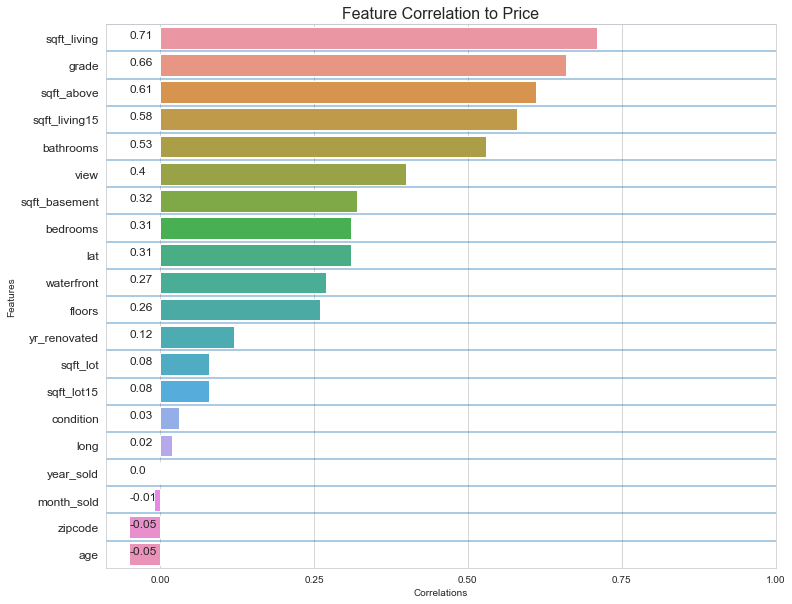

In [17]:
#Plot the feature correlation to price
plt.figure(figsize=(12, 10))
sns.set_style('whitegrid')
sns.barplot(sorted_correlations['correlations'], sorted_correlations['feature'])
plt.title('Feature Correlation to Price', fontsize=16)
plt.xlabel('Correlations')
plt.ylabel('Features')
plt.yticks(fontsize=12)
plt.xticks(np.linspace(0, 1, 5))
for ind, val in enumerate(sorted_correlations['correlations']):
    plt.text(x= -0.05, y= ind, s= val, fontsize=12)
    plt.axhline(ind - .5, alpha=0.5)
plt.show()

There are some features with almost no correlation to price, but rather than dropping these features right away, we can build a model and potentially engineer new features as we move along.

# Model 1: Using All Features

In [18]:
#Function for linear regression
def linear_model(dataframe):
    '''Build linear regression model, return model and print model summary from statsmodels.'''
    #Create feature and target columns
    X = dataframe.drop(columns=['price'], axis=1)
    y = dataframe.price
    
    #Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    #Fit the model
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    model
    
    #View model accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Training Score:', round(train_score, 2))
    print('Test Score:', round(test_score, 2))
    print('Coefficients:', model.coef_)
    
    #View model summary in statsmodels
    X_train = sm.add_constant(X_train)
    smmodel = sm.OLS(y_train, X_train).fit()
    print(smmodel.summary())
    return smmodel

In [19]:
model = linear_model(df)
model

Training Score: 0.71
Test Score: 0.68
Coefficients: [-3.57439404e+04  4.70431772e+04  1.21620206e+02  1.08804339e-01
  8.63177465e+03  6.13690732e+05  6.15776333e+04  2.90407722e+04
  9.50660820e+04  6.16625223e+01  3.00678038e+01  2.03930440e+01
 -5.39723872e+02  5.96059842e+05 -1.98415708e+05  2.08665048e+01
 -3.51055164e-01  1.38101384e+03  3.90461119e+04  2.74425344e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1522.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:04:40   Log-Likelihood:            -1.7190e+05
No. Observations:               12609   AIC:                         3.438e+05
Df Residuals:                   12588   BIC:                         

Our first model has an adjusted r-squared of .707. There are a couple features with p_values that are insignificant, but before we drop these features from the data, let's check our residuals.

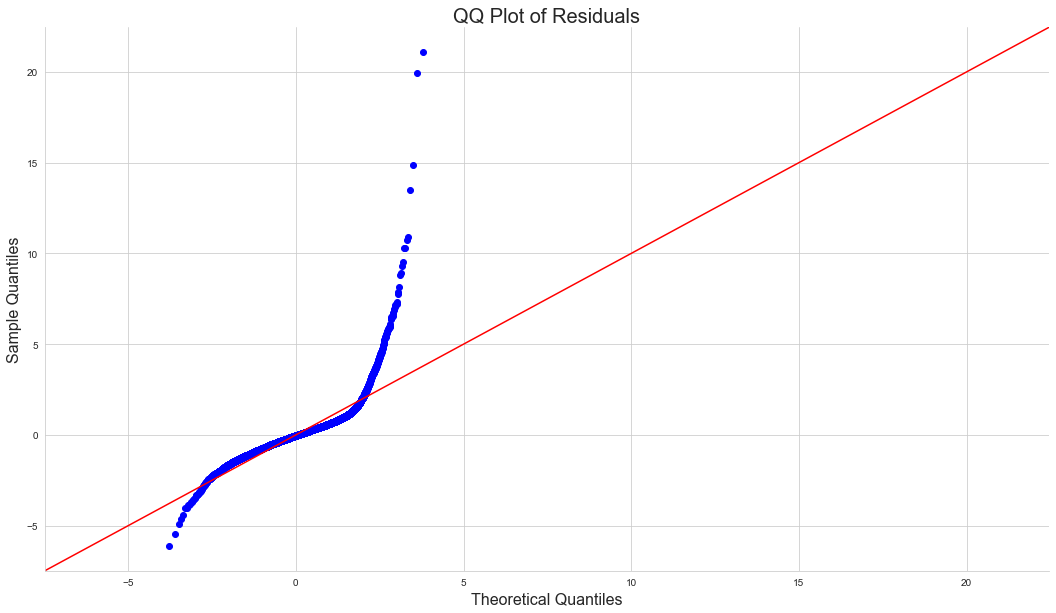

In [20]:
# Set the Seaborn style for better visualization
sns.set_style("whitegrid")

# Create a QQ plot
fig, ax = plt.subplots(figsize=(18, 10))
sm.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize the plot
ax.set_title("QQ Plot of Residuals", fontsize=20)
ax.set_xlabel("Theoretical Quantiles", fontsize=16)
ax.set_ylabel("Sample Quantiles", fontsize=16)
sns.despine()

# Show the plot
plt.show()


Residuals are not normal, which violates are assumption of normality. Rather than using a log transformation, we will remove outliers.

# Model 2: Checking the distribution of house prices

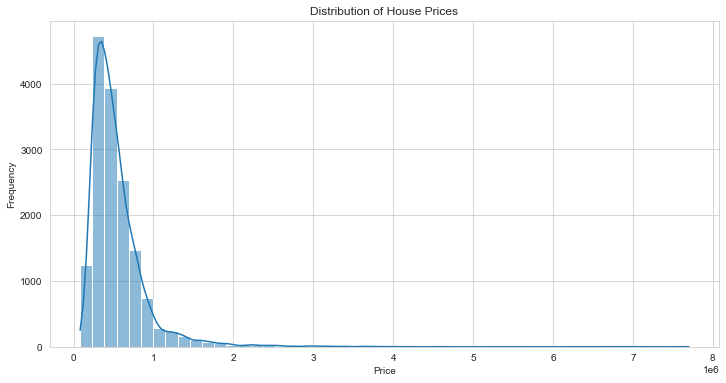

In [21]:
# Plotting the distribution of house prices
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True,)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The distribution of house prices is right-skewed, meaning that there are a few houses with extremely high prices compared to the majority. Most of the houses are priced in the lower to mid-range, with a peak around 300,000 to 500,000.

The distribution is positively skewed, so we will reduce our data further. This will limit our analysis to focusing more on middle class families with homes under 900k.

In [22]:
df = df[df['price'] <= 900000]

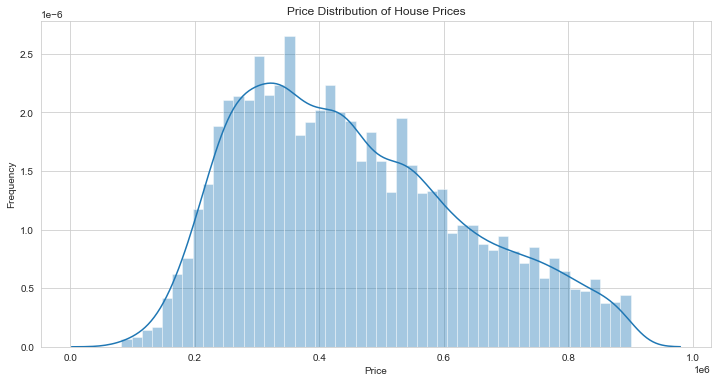

In [23]:
plt.figure(figsize=(12, 6))
sns.distplot(df.price,  bins=50, kde=True,)
plt.title('Price Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Although it is slightly skewed, the dependent variable is much closer to a normal distribution. Let's build a model with this transformation.

In [24]:
model = linear_model(df)
model

Training Score: 0.68
Test Score: 0.67
Coefficients: [-8.11068363e+03  2.09302906e+04  7.56621598e+01  2.14778515e-01
  3.25006956e+04  1.21937512e+05  2.82154834e+04  2.40401647e+04
  6.51354579e+04 -1.25387969e+01 -1.19470383e+01  1.22593735e+01
 -1.60745280e+02  5.28323064e+05 -1.09533582e+04  4.53470808e+01
 -3.54709344e-02 -1.17898289e+02  1.83367299e+04  1.62670123e+03]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1196.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:04:41   Log-Likelihood:            -1.4791e+05
No. Observations:               11416   AIC:                         2.959e+05
Df Residuals:                   11395   BIC:                         

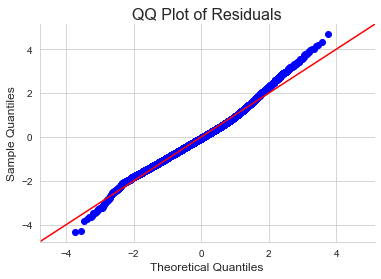

In [25]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

# Customize the plot
plt.title("QQ Plot of Residuals", fontsize=16)
plt.xlabel("Theoretical Quantiles", fontsize=12)
plt.ylabel("Sample Quantiles", fontsize=12)
sns.despine()

# Show the plot
plt.show()

Removing outliers and reducing our dependent variable brought down our adjusted r-squared to .677, but our residuals are much closer to a normal distribution. Several features still have insignifanct p-values greater than 0.05, but let's look at collinearity first prior to dropping these.

Next, let's explore the relationship between the house price and some potential predictor variables. We'll start by examining how the price varies with:

1. Number of bedrooms
2. Number of bathrooms
3. Living space (sqft_living)
4. House grade

We'll use boxplots to visualize these relationships.

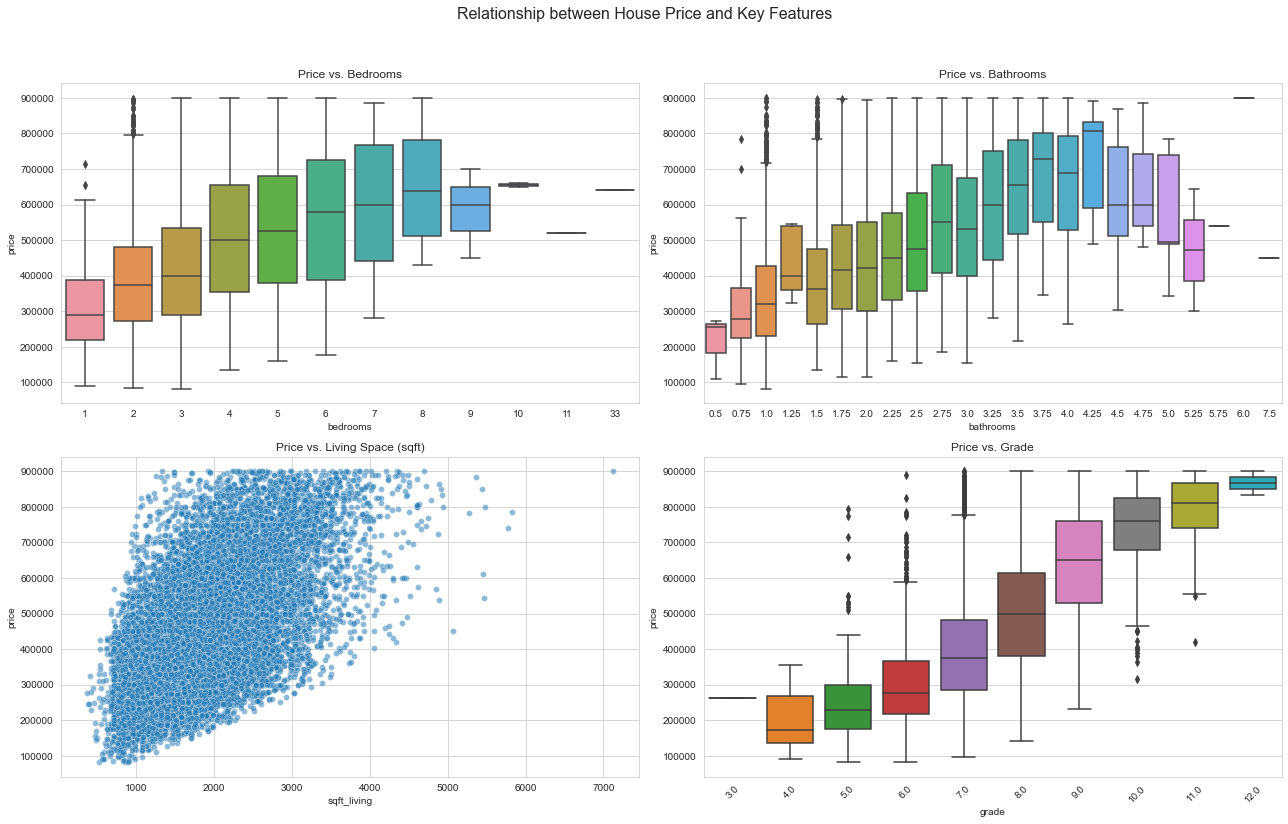

In [26]:
# Setting up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Relationship between House Price and Key Features', fontsize=16)

# Price vs. Bedrooms
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Price vs. Bedrooms')

# Price vs. Bathrooms
sns.boxplot(x='bathrooms', y='price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price vs. Bathrooms')

# Price vs. sqft_living
sns.scatterplot(x='sqft_living', y='price', data=df, ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Price vs. Living Space (sqft)')

# Price vs. Grade
sns.boxplot(x='grade', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price vs. Grade')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Here's a summary of the visualizations:

1. **Price vs. Bedrooms**:
   - Generally, houses with more bedrooms tend to have higher prices. However, there's an outlier with a house that has 33 bedrooms, which seems unusual given its price range.
   
2. **Price vs. Bathrooms**:
   - Houses with more bathrooms generally have higher prices. The trend is evident until around 6-7 bathrooms, after which the price variation becomes more dispersed.
   
3. **Price vs. Living Space (sqft)**:
   - There's a positive correlation between living space (in sqft) and house price. As the living space increases, the house price also tends to increase.
   
4. **Price vs. Grade**:
   - House grade also has a clear impact on price. Higher grade houses generally fetch higher prices. The variation in prices also seems to increase with higher grades.

From the visualizations, it's evident that features like the number of bedrooms, bathrooms, living space, and grade have an influence on house prices.

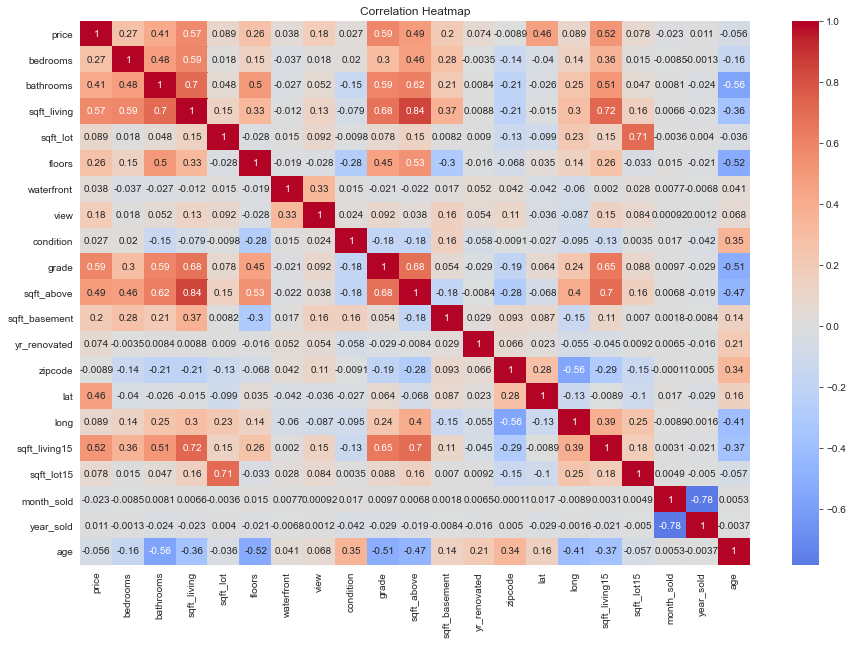

In [27]:
# Investigate which features are correlated 

# Correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As expected there are some multicollinearity issues which we need to address.

We note that `sqft_above` and `sqft_living` are highly positively correlated, which is expected as `sqft_above` is the square footage of the house apart from basement (and we saw earlier that most houses did not have a basement). We will choose to keep `sqft_living` as it encompasses more information and drop the `sqt_above` feature. We also see that `sqft_living15` is moderately highly correlated with `sqft_living` and so we will drop this feature too.

We also note that `sqft_lot` and `sqft_lot15` are highly positively correlated and we will choose to keep `sqft_lot` as it relates directly to the house as opposed to its neighbours (and so potentially easier to obtain data for and generalise.)

## Model 1: Using All Features


### Simple Regression

### Price vs. Living Space (sqft)

We are using sqft15 as the predictor of our target value which is price. We shall start by visualizing the relationship between 'sqft_living15' and 'price' . As the living space increases, the price of the house also seems to increase.

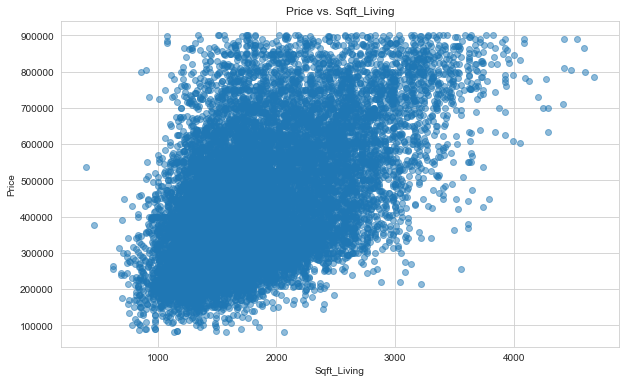

In [28]:
# Scatter plot to visualize the relationship between sqft_living and price
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living15'], df['price'], alpha=0.5)
plt.title('Price vs. Sqft_Living')
plt.xlabel('Sqft_Living')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## OLS regression 

In [29]:
X_OLS = df[["sqft_living15"]]
y_OLS = df["price"]

In [30]:
#Creating the Model
model = sm.OLS(endog=y_OLS, exog=sm.add_constant(X_OLS))
model

In [31]:
results = model.fit()
results

In [32]:
results.fvalue, results.f_pvalue

(5260.494548481747, 0.0)

In [33]:
results.rsquared

0.2693615308590107

In [34]:
results.params

const            146994.549246
sqft_living15       162.681873
dtype: float64

In [35]:
results.pvalues

const            2.848791e-233
sqft_living15     0.000000e+00
dtype: float64

In [36]:
print(results.conf_int())

                           0              1
const          138323.540971  155665.557521
sqft_living15     158.285335     167.078410


In [37]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     5260.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:04:45   Log-Likelihood:            -1.9072e+05
No. Observations:               14271   AIC:                         3.814e+05
Df Residuals:                   14269   BIC:                         3.815e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.47e+05   4423.690     33.229

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     5260.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:04:45   Log-Likelihood:            -1.9072e+05
No. Observations:               14271   AIC:                         3.814e+05
Df Residuals:                   14269   BIC:                         3.815e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.47e+05   4423.690     33.229      0.000    1.38e+05    1.56e+05
sqft_living15   162.6819      2.243     72.529      0.000     158.285     167.078
==============================================================================
Omnibus:                      542.114   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.165
Skew:                           0.497   Prob(JB):                    4.74e-131
Kurtosis:                       2.849   Cond. No.                     6.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

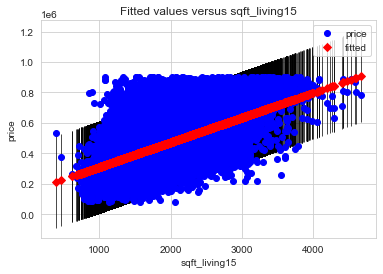

In [39]:
sm.graphics.plot_fit(results, "sqft_living15")
plt.show()

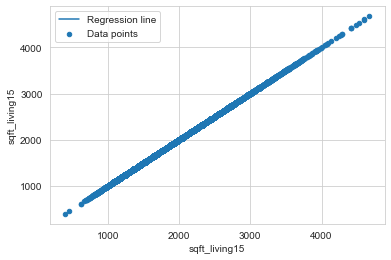

In [40]:
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living15", y="sqft_living15", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)
ax.legend();

## SIMPLE LINEAR REGESSION

In [41]:
x = df[["sqft_living15"]]
y = df["price"]

In [42]:
# creating variable for train set and test set for our model. the train set will be 40% of our df

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.40, random_state = 55)

In [43]:
lm = LinearRegression ()

In [44]:
lm.fit(x_train, y_train)

LinearRegression()

In [45]:
coeff_df =pd.DataFrame(lm.coef_,x.columns,columns =['Coefficient'])

                       

In [46]:
coeff_df

,Coefficient
sqft_living15,164.299343


In [47]:
predictions =lm.predict(x_test)

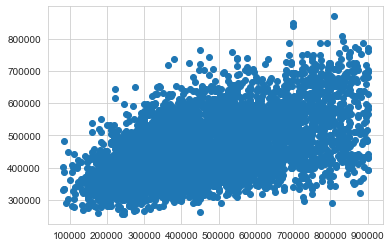

In [48]:
plt.scatter(y_test,predictions)

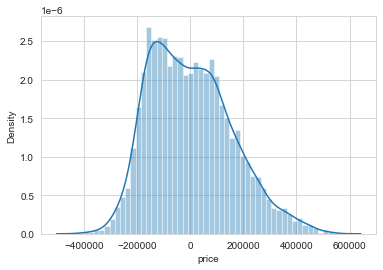

In [49]:
sns.distplot((y_test-predictions), bins =50);